<h1>1. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
# Import data
import pandas
from pathlib import Path
import os

# Changing directory
os.chdir(Path(os.path.realpath("")).resolve().parents[0])

In [4]:
data = pandas.read_csv('./data/preprocessed_data.csv', nrows = 50000)

# Defining X and Y
Y = data['project_is_approved']
X = data.drop(['project_is_approved'], axis = 1)

X.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [5]:
# Split the dataset 

#importing pandas
import pandas as pd

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y)

<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [6]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 

#Set 1: 
#importing relevant sklearn packages
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer(min_df = 10)

#seggregating the required data from train data set
preprocessed_essays_train = X_train['essay'].values
preprocessed_essays_test = X_test['essay'].values

#fitting the data into countvectorizer
countvectorizer.fit(preprocessed_essays_train)

#transforming BOW counter to preprocessed_esssays
essay_bow_train = countvectorizer.transform(preprocessed_essays_train)
essay_bow_test = countvectorizer.transform(preprocessed_essays_test)


In [7]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 

#Set 2: 
#importing relevant sklearn packages
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(min_df = 10)

#fitting train data into tf-idf vectorizer
tfidfvectorizer.fit(preprocessed_essays_train)

#applying tf-idf to preprocessed essays
essay_tfidf_train = tfidfvectorizer.transform(preprocessed_essays_train)
essay_tfidf_test = tfidfvectorizer.transform(preprocessed_essays_test)

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [8]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().

#importing relevant libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

#segregating categorical data
categoricaldata_train = X_train[['school_state', 'teacher_prefix', 'project_grade_category', 'clean_categories', 'clean_subcategories']]
categoricaldata_test = X_test[['school_state', 'teacher_prefix', 'project_grade_category', 'clean_categories', 'clean_subcategories']]

#encoding all of the categorical data into a sparse matrix using one hot encoder
encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(categoricaldata_train)
encoded_categoricaldata_train = encoder.transform(categoricaldata_train)
encoded_categoricaldata_test = encoder.transform(categoricaldata_test)

#fitting numerical values into MinMaxScaler for 'price'
'''
Comment to the Evaluator: 
Why should price which is a definitive value for a given row be treated as a vector column-wise
Instead a MinMaxScaler based noramlization makes more sense
'''
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train['price'].values.reshape(-1,1))

norm_price_train = minmaxscaler.transform(X_train['price'].values.reshape(-1,1))
norm_price_test = minmaxscaler.transform(X_test['price'].values.reshape(-1,1))

#fitting numerical values into MinMaxScaler for 'teacher_number_of_previously_posted_projects'
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

norm_postedprojects_train = minmaxscaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
norm_postedprojects_test = minmaxscaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

In [9]:
#concatenating all data into single vector. Code obtained from: https://stackoverflow.com/a/19710648/4084039
#Set 1: BOW using countvectorizer
X_tr = hstack((essay_bow_train, encoded_categoricaldata_train, norm_price_train, norm_postedprojects_train)).tocsr()
X_te = hstack((essay_bow_test, encoded_categoricaldata_test, norm_price_test, norm_postedprojects_test)).tocsr()

#Set 2: TF-IDFvectorizer
X_TR = hstack((essay_tfidf_train, encoded_categoricaldata_train, norm_price_train, norm_postedprojects_train)).tocsr()
X_TE = hstack((essay_tfidf_test, encoded_categoricaldata_test, norm_price_test, norm_postedprojects_test)).tocsr()

In [10]:
X_tr.shape

(37500, 11302)

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

[-11.512925464970229, -9.210340371976182, -7.600902459542082, -6.907755278982137, -5.298317366548036, -4.605170185988091, -2.995732273553991, -2.3025850929940455, -0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046, 3.912023005428146, 4.605170185988092]


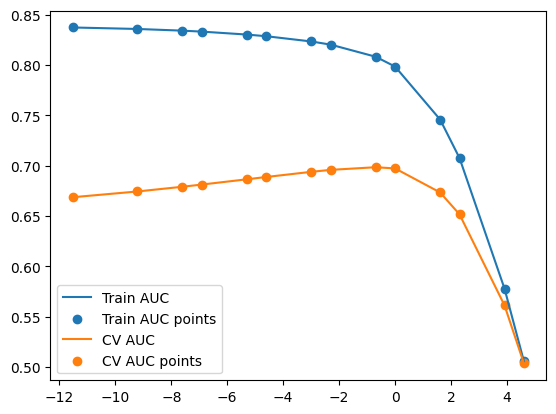

In [12]:
# Perform Hyperparameter Tuning - class_prior = None
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

#importing required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier ## Used for practicing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

#hyperparameter tuning for alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100], using gridsearchcv
alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
est = MultinomialNB()
parameter_grid = {'alpha':alpha}
randomsearchcv = RandomizedSearchCV(est, parameter_grid, cv = 10, return_train_score=True, scoring = 'roc_auc',n_iter = 14)
randomsearchcv.fit(X_tr, Y_train)


import pandas as pd
import matplotlib.pyplot as plt
import math
results = pd.DataFrame.from_dict(randomsearchcv.cv_results_)
results = results.sort_values(['param_alpha'])

#gathering results
train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
test_auc = results['mean_test_score']
test_auc_std = results['std_test_score']
logalpha = [math.log(x) for x in list(results['param_alpha'])] #Creating a list of logalpha values for the 

plt.plot(logalpha, train_auc, label = "Train AUC")
plt.scatter(logalpha, train_auc, label = "Train AUC points")
plt.plot(logalpha, test_auc, label = "CV AUC")
plt.scatter(logalpha, test_auc, label = "CV AUC points")
plt.legend()
plt.plot()

print(logalpha)

###### alpha = 1, provides the best CV AUC, therefore is the chosen hyperparameter

[-11.512925464970229, -9.210340371976182, -7.600902459542082, -6.907755278982137, -5.298317366548036, -4.605170185988091, -2.995732273553991, -2.3025850929940455, -0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046, 3.912023005428146, 4.605170185988092]


[]

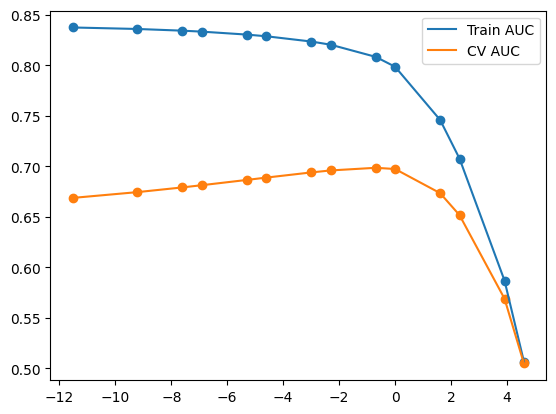

In [14]:
#Perform Hyperparameter Tuning - class_prior = [0.5,0.5]
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

#importing required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier ## Used for practicing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

#hyperparameter tuning for alpha = list(numpy.linspace(10**-5,100, num = 20), using gridsearchcv

alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]

est = MultinomialNB(class_prior = [0.5,0.5])
parameter_grid = {'alpha':alpha}
randomsearchcv = RandomizedSearchCV(est, parameter_grid, cv = 10, return_train_score=True, scoring = 'roc_auc', n_iter = 14)
randomsearchcv.fit(X_tr, Y_train)

#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import math

#gathering results
results = pd.DataFrame.from_dict(randomsearchcv.cv_results_)
results = results.sort_values(['param_alpha'])
train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
test_auc = results['mean_test_score']
test_auc_std = results['std_test_score']
logalpha = [math.log(x) for x in list(results['param_alpha'])]


#plotting results
print(logalpha)
plt.plot(logalpha, train_auc, label = "Train AUC")
plt.scatter(logalpha, train_auc)
plt.plot(logalpha, test_auc, label = "CV AUC")
plt.scatter(logalpha, test_auc)
plt.legend()
plt.plot()

###### alpha = 1, provides the best CV AUC, even when probability class =  [0.5,0.5] therefore is the chosen hyperparameter

In [15]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,

alfa = 1
multinomialNB_set1 = MultinomialNB(alpha = alfa)

#fiting train dataset
multinomialNB_set1.fit(X_tr, Y_train)


MultinomialNB(alpha=1)

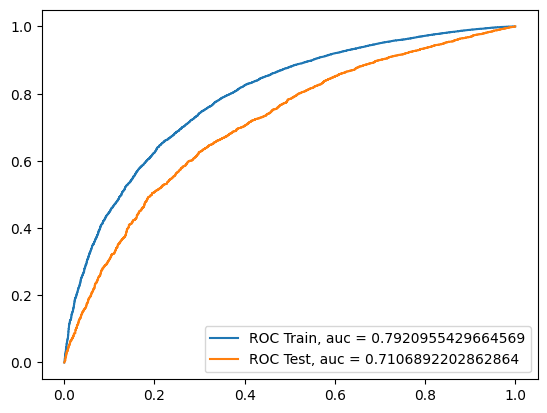

In [16]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
#importing librarires

#predicting the test and train dataset
Y_testpred = multinomialNB_set1.predict_proba(X_te)[:,1]
Y_trainpred = multinomialNB_set1.predict_proba(X_tr)[:,1]

#importing libraries and calculating fp,tp and threshold using roc_curve
from sklearn.metrics import roc_curve, auc
fp_train, tp_train, threshold_train = roc_curve(Y_train, Y_trainpred, drop_intermediate = False)
fp_test, tp_test, threshold_test = roc_curve(Y_test, Y_testpred, drop_intermediate = False)

#calculating auc: X-axis = fpr, Y-axis: tpr
train_auc1 = auc(fp_train, tp_train)
test_auc1 = auc(fp_test, tp_test)

#plotting the curves
plt.plot(fp_train, tp_train, label = "ROC Train, auc = "+str(train_auc1))
plt.plot(fp_test, tp_test, label = "ROC Test, auc = "+str(test_auc1))
plt.legend()
plt.show()


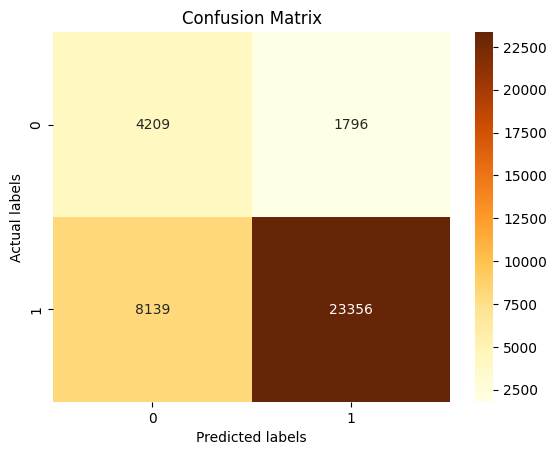

In [22]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

#calculating maximum threshold value
import numpy
maxthreshval = float(threshold_train[numpy.argmax(tp_train*(1-fp_train))])

#determining classvalues based on the probability scores crossing the thresholdvalue

bestprob_train = [1 if x > maxthreshval else 0 for x in Y_trainpred]
bestprob_test = [ 1 if x > maxthreshval else 0 for x in Y_testpred]


#importing data libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#creating confusion matrix
cm_train = confusion_matrix(Y_train, bestprob_train)
cm_test = confusion_matrix(Y_test, bestprob_test)

#creating a heatbased confusion matrix. Code obtained from: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
ax = plt.subplot();
sns.heatmap(cm_train, annot=True,fmt="d",cmap='YlOrBr')
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

#### Set 2

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.013645      0.000832         0.003048        0.000317     0.00001   
1        0.013262      0.000306         0.002912        0.000183      0.0005   
2        0.013260      0.000299         0.002989        0.000170      0.0001   
3        0.013177      0.000386         0.002948        0.000178       0.005   
4        0.012719      0.000405         0.002847        0.000083       0.001   
5        0.012568      0.000303         0.002812        0.000070        0.05   
6        0.012769      0.000408         0.002810        0.000080        0.01   
7        0.013159      0.000335         0.002950        0.000206         0.1   
8        0.013169      0.000402         0.002921        0.000154         0.5   
9        0.013266      0.000300         0.002950        0.000137           1   
10       0.013055      0.000318         0.002837        0.000132           5   
11       0.013166      0.000365         

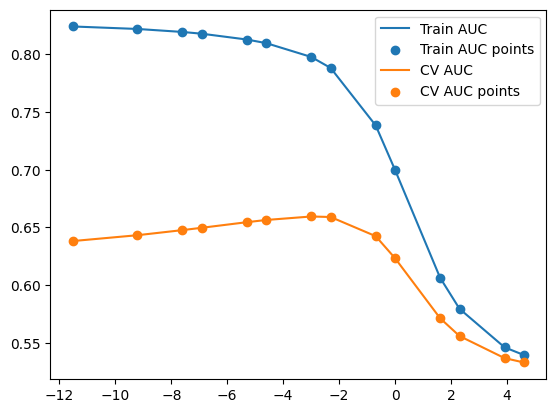

In [23]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

#importing required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier ## Used for practicing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

#hyperparameter tuning for alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100], using gridsearchcv
alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
est = MultinomialNB()
parameter_grid = {'alpha':alpha}
randomsearchcv = RandomizedSearchCV(est, parameter_grid, cv = 10, return_train_score=True, scoring = 'roc_auc',n_iter = 14)
randomsearchcv.fit(X_TR, Y_train)

import pandas as pd
import matplotlib.pyplot as plt
import math
results = pd.DataFrame.from_dict(randomsearchcv.cv_results_)
print(results)
results = results.sort_values(['param_alpha'])

#gathering results
train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
test_auc = results['mean_test_score']
test_auc_std = results['std_test_score']
logalpha = [math.log(x) for x in list(results['param_alpha'])] #Creating a list of logalpha values for the 

plt.plot(logalpha, train_auc, label = "Train AUC")
plt.scatter(logalpha, train_auc, label = "Train AUC points")
plt.plot(logalpha, test_auc, label = "CV AUC")
plt.scatter(logalpha, test_auc, label = "CV AUC points")
plt.legend()
plt.plot()

print(logalpha)

print("="*50)

#### logalpha near -2 or alpha = 0.1 , provides the best CV AUC, therefore is the chosen hyperparameter

In [24]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
alfa = 0.1
multinomialNB_set2 = MultinomialNB(alpha = alfa)

#fiting train dataset
multinomialNB_set2.fit(X_TR, Y_train)


MultinomialNB(alpha=0.1)

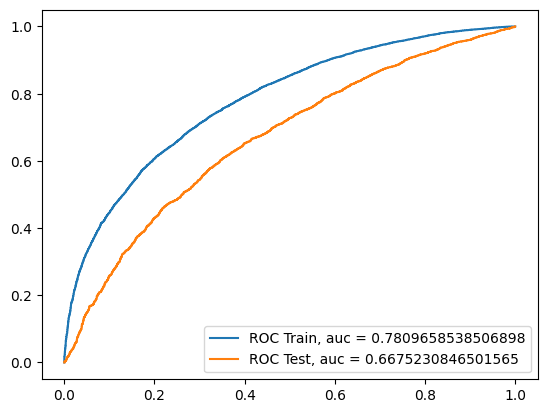

In [25]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
# predicting the test and train dataset
Y_testpred = multinomialNB_set2.predict_proba(X_TE)[:,1]
Y_trainpred = multinomialNB_set2.predict_proba(X_TR)[:,1]

#importing libraries and calculating fp,tp and threshold using roc_curve
from sklearn.metrics import roc_curve, auc
fp_train, tp_train, threshold_train = roc_curve(Y_train, Y_trainpred, drop_intermediate = False)
fp_test, tp_test, threshold_test = roc_curve(Y_test, Y_testpred, drop_intermediate = False)

#calculating auc: X-axis = fpr, Y-axis: tpr
train_auc = auc(fp_train, tp_train)
test_auc = auc(fp_test, tp_test)

#plotting the curves
plt.plot(fp_train, tp_train, label = "ROC Train, auc = "+str(train_auc))
plt.plot(fp_test, tp_test, label = "ROC Test, auc = "+str(test_auc))
plt.legend()
plt.show()

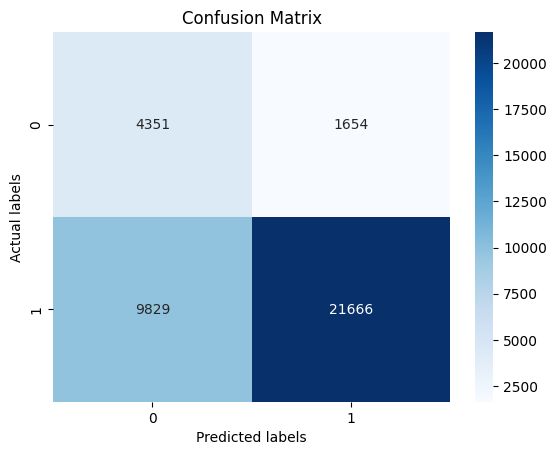

In [26]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
# calculating maximum threshold value
import numpy
maxthreshval = float(threshold_train[numpy.argmax(tp_train*(1-fp_train))])

#determining classvalues based on the probability scores crossing the thresholdvalue

bestprob_train = [1 if x > maxthreshval else 0 for x in Y_trainpred]
bestprob_test = [ 1 if x > maxthreshval else 0 for x in Y_testpred]


#importing data libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#creating confusion matrix
cm_train = confusion_matrix(Y_train, bestprob_train)
cm_test = confusion_matrix(Y_test, bestprob_test)

#creating a heatbased confusion matrix. Code obtained from: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
ax = plt.subplot()
sns.heatmap(cm_train, annot=True,fmt="d",cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [44]:
categoricaldata_train.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'clean_categories', 'clean_subcategories'],
      dtype='object')

In [46]:
#set 2: Printing top 20 features associated with positive class (code obtained from - https://imgur.com/mWvE7gj)
#gathering postive feature log probabilities
posfeature_log_prob = multinomialNB_set2.feature_log_prob_[1]
#gathering negative feature log probabilities
negfeature_log_prob = multinomialNB_set2.feature_log_prob_[0]


#creating a list of feature names
vectorizernames = []
#adding feature names in the order of the addition 
## 1. Adding tfidf BOW:
vectorizernames.extend(tfidfvectorizer.get_feature_names_out(['essay']))
## 2. Adding names from OneHotEncoder for categorical variables:
vectorizernames.extend(encoder.get_feature_names_out(list(categoricaldata_train.columns)))
## 3. Adding numerical features:
vectorizernames.extend(['price'])
vectorizernames.extend(['teacher_number_of_previously_posted_projects'])

#gathering positive and negative log probabilities into respective feature dictionaries

top20posfeat = list(numpy.argsort(posfeature_log_prob))[-20:]
top20negfeat = list(numpy.argsort(negfeature_log_prob))[-20:]

#printing list of top 20 feature names for features for class 0 and 1

from beautifultable import BeautifulTable
#class 1
table = BeautifulTable()
table.columns.header = ["Feature Name", "Log probability value - Class 1\n(Ascending order)"]
for x in top20posfeat:
    table.rows.append([vectorizernames[x], posfeature_log_prob[x]])
print(table)

print("\n"+"="*100+"\n")
#class 0 
table = BeautifulTable()
table.columns.header = ["Feature Name", "Log probability value - Class 0\n(Ascending order)"]
for x in top20negfeat:
    table.rows.append([vectorizernames[x], negfeature_log_prob[x]])
print(table)


+--------------------------------------------+---------------------------------+
|                Feature Name                | Log probability value - Class 1 |
|                                            |        (Ascending order)        |
+--------------------------------------------+---------------------------------+
| clean_subcategories_literacy literature_wr |             -5.545              |
|                   iting                    |                                 |
+--------------------------------------------+---------------------------------+
| clean_subcategories_literature_writing mat |             -5.524              |
|                  hematics                  |                                 |
+--------------------------------------------+---------------------------------+
|              school_state_fl               |             -5.448              |
+--------------------------------------------+---------------------------------+
|              school_state_

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [47]:
# Summarizing the data
#Tables constructed using BeautifulTables python library: https://pypi.org/project/beautifultable/
table = BeautifulTable()
table.columns.header = ["Vectorizer", "Model", "Hyperparameter", "AUC"]
table.rows.append(["Bag of Words", "Randomized", 1, test_auc1])
table.rows.append(["tf-idf vectorizer", "Randomized", 0.1, test_auc])
print(table)


+-------------------+------------+----------------+-------+
|    Vectorizer     |   Model    | Hyperparameter |  AUC  |
+-------------------+------------+----------------+-------+
|   Bag of Words    | Randomized |       1        | 0.711 |
+-------------------+------------+----------------+-------+
| tf-idf vectorizer | Randomized |      0.1       | 0.668 |
+-------------------+------------+----------------+-------+
